In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from view_transformer import view_transformer

In [5]:
cv2.namedWindow('photo', cv2.WINDOW_FULLSCREEN)
cv2.namedWindow('transformed', cv2.WINDOW_FULLSCREEN)
img = cv2.imread('./photo.jpg')

# cv2.scatter(x_array, y_array, color='red')

# Определение координат точки (x, y)
source = np.array([(250, 160), (610, 140), (1120, 320), (670, 460)])
circle_color = (0, 0, 255)
circle_radius = 5

for center in source:
    # Рисование точки на изображении
    cv2.circle(img=img, center=center, radius=circle_radius, color=circle_color, thickness=circle_radius)

SOURCE = source
TARGET_WIDTH = 400
TARGET_HEIGHT = 600
TARGET = np.array([
    [0, 0],
    [TARGET_WIDTH - 1, 0],
    [TARGET_WIDTH - 1, TARGET_HEIGHT - 1],
    [0, TARGET_HEIGHT - 1],
])

transformer = view_transformer(source=SOURCE, target=TARGET)

bounding_boxes = np.array([[600, 200, 700, 270]])
print(bounding_boxes)
circle_color = (255, 0, 0)
for [x_1, y_1, x_2, y_2] in bounding_boxes:
    # Рисование точки на изображении
    cv2.rectangle(img=img, pt1=(x_1, y_1), pt2=(x_2, y_2), color=(0, 255, 0), thickness=circle_radius)
    


points = np.array([[(x_1 + x_2) / 2, y]
                          for [x_1, _, x_2, y] in bounding_boxes]).astype('int')
for center in points:
    # Рисование точки на изображении
    cv2.circle(img=img, center=center, radius=circle_radius, color=circle_color, thickness=circle_radius)
points = transformer.transform_points(points=points).astype(int)
print(points)


cv2.imshow('photo', img)

transformed = cv2.warpPerspective(img, transformer.m, (TARGET_WIDTH, TARGET_HEIGHT), flags=cv2.INTER_LINEAR)
cv2.imshow('transformed', transformed)

while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

[[600 200 700 270]]
[[154 386]]


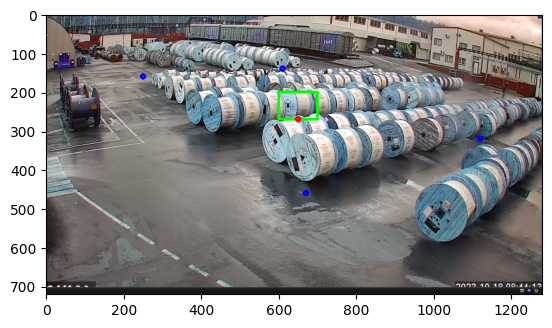

In [7]:
plt.imshow(img)

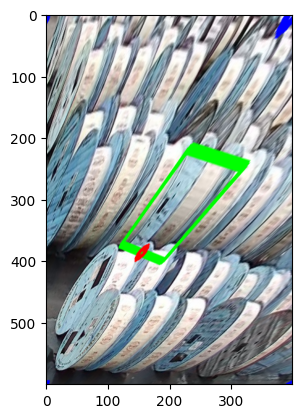

In [8]:
plt.imshow(transformed)